# Module 8 - Final Project Story 

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for your data story to a single, relatively simple perspective.

- Identify what aspects or attributes from the provided data that affords addressing your problem.  If incorporating another, completely new, data set - explain it as well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments and markdown cells that explain the purpose of the operation(s) as well as interpreting the results of those operations.


You can make your project more unique by:

- Comparing two or more different statistical / machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources or in class collaborations - this should be your idea and analysis!
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write an analytical story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think about the data file that has been provided for this project to use in this class. 
Additionally, you can search online for potential data to incorporate with the provided data to support the story idea.

In the cell below, please detail the source of any addiitonal data (with link) as welll as preview the data story you hope to uncover.

The story revolves around understanding how socioeconomic factors such as income, education, unemployment rates, and poverty levels correlate with broadband access in different regions. We aim to uncover the impact of these factors on digital inclusion and identify potential disparities.Find answers to following questions:
1. Identify areas with low broadband access
2. Identify areas with low access to high-speed broadband
3. Identify areas with a low number of broadband providers
4. Compare broadband access in rural and urban areas

## Step 2: Remember your Audience

In the cell below, describe the audience for this analysis!
 * Who will the audience be?
 * What value will they derive from your story?

1. Our primary audience includes policymakers, nonprofits, and researchers interested in addressing the digital divide. 
2. Presenting insights in an accessible and informative manner to drive informed decision-making and policy changes.

## Step 3: Find and Stage Your Data

If you incorporate data from another source, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note** 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.
The full pathname has been provided for the Missouri County-based data that has been provided.  Be sure to include it below as well!!!

I am using MO_County_Data_CSV_DSA7010F23_Project_Data.csv file and i have uploaded it in exercises folder (/home/rv9cd/jupyter/f23dsa7010_rv9cd/module8/exercises/MO_County_Data_CSV_DSA7010F23_Project_Data.csv).

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
#all the required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
with open('MO_County_Data_CSV_DSA7010F23_Project_Data-v2.csv') as file:
    data_frame = pd.read_csv(file)

In [3]:
data_frame.head

<bound method NDFrame.head of      cnty_fips       cnty_name  povpct  pop_2014   pop_densit  age_lt18  \
0        29001           Adair    26.9     25602    44.864523      4759   
1        29003          Andrew    10.7     17379    39.784793      4020   
2        29005        Atchison    12.2      5382     9.795111      1078   
3        29007         Audrain    17.2     25887    37.117682      6068   
4        29009           Barry    20.2     35662    45.068915      8321   
..         ...             ...     ...       ...          ...       ...   
110      29223           Wayne    26.4     13452    17.389481      2777   
111      29225         Webster    17.8     36888    62.115239     10028   
112      29227           Worth    15.5      2073     7.739857       427   
113      29229          Wright    22.7     18291    26.821932      4636   
114      29510  St. Louis City    28.8    317419  4791.987636     64587   

     pct_age_lt  age_18_65  pct_age_18  age_gt_65  ...  COVVac1Dos  \

In [4]:
#Since we are not able to see All the columns present in the data frame printing all.
for column_name in data_frame.columns[:240]:
    print(column_name)

cnty_fips
cnty_name
povpct
pop_2014
pop_densit
age_lt18
pct_age_lt
age_18_65
pct_age_18
age_gt_65
pct_age_gt
female_tot
female_pct
male_total
male_pct
rural_totp
rural_pct
urban_totp
urban_pct
maxeducHS
maxeducSom
pct_unempl
pricarephy
pcp_per_ca
dentist_to
dentist_pe
mentalhp_t
mentalhp_p
preventHos
food_insec
limit_food
res_concxn
pctpopwbba
pctpopwobb
pctdsgt15K
pctdsgt25K
pctdsgt50K
pctdsgt100
pctdsgt1G_
pctusgt1K3
pctusgt3K4
pctusgt4K6
pctusgt6K1
pctusgt10K
pctusgt15K
pctusgt25K
pctusgt50K
pctusgt100
pctusgt1G_
mcds_prop
mcds_tier
mcus_prop
mcus_tier
provcnt_bu
provcnt_co
cumm_pro_1
cumm_pro_2
cumm_pro_3
cumm_pro_4
cumm_pro_5
cumm_pro_6
cumm_pro_7
cumm_pro_8
pctpopdsgt
pctpopusgt
hcf_13_15
tcf_13_15
bpr_ruralp
nchs_rural
omb_rural
rucc_2013
rucc_metro
usac_rural
rural_totp.1
rural_pct.1
limit_food.1
Common_dow
Common_upl
AveMinHosp
AveMinUrgC
AveMinPubH
AveMinNurs
AveMinECHO
GiniIndex
TPopS2701
HspanyRace
PctHispani
AfrAmer
PctAfAmer
Disability
PctDisable
InsTpop
InsHisp
InsAfAmer

Now taking Relevent columns for my problem
1. cnty_name : county name 
2. pctpopwbba : Percentage of Population with Broadband Access
3. pop_densit : Population Density 
4. Population 
5. age_lt18  
6. age_18_65
7. age_gt_65
8. female_pct : frmale precentage
9. male_pct : male percentage
10. E_MEDIAN : Median salary
11. povpct : Percent in poverty
12. P_BPovLev : precentage below poverty line
13. pop_density : population density
14. provcnt_bu : provier count business
15. provcnt_co : provider count customer
16. usac_rural : classify rural, urban or partially rural

In [5]:
data_frame = data_frame[['cnty_name','pctpopwbba','Population','age_lt18', 'age_18_65', 'age_gt_65','female_pct', 'male_pct','E_MEDINC','povpct','P_BPovLev','P_64UnEmrt','pop_densit','provcnt_bu', 'provcnt_co','usac_rural']]
#Print the dataset
print(data_frame)

          cnty_name  pctpopwbba  Population  age_lt18  age_18_65  age_gt_65  \
0             Adair        74.5       25343      4759      17400       3443   
1            Andrew        83.5       17712      4020      10393       2967   
2          Atchison         0.0        5143      1078       3046       1258   
3           Audrain        69.4       25388      6068      15554       4265   
4             Barry        48.3       35789      8321      20248       7093   
..              ...         ...         ...       ...        ...        ...   
110           Wayne        18.8       12873      2777       7738       2937   
111         Webster        51.9       39592     10028      21592       5268   
112           Worth        63.5        2013       427       1141        506   
113          Wright        15.6       18289      4636      10237       3418   
114  St. Louis City       100.0      300576     64587     217367      35465   

     female_pct  male_pct  E_MEDINC  povpct  P_BPov

## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). Make sure to provide interpretations of results and analytics!!!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In the upcoming data cleaning and preprocessing task, I'll start with removing unnecessary columns,  label encoding, and utilizing a correlation matrix. Additionally, I'll address missing values through appropriate imputation methods to ensure a clean and reliable dataset for analysis and modeling.

In [1]:
df = data_frame[['cnty_name','pctpopwbba','Population','age_lt18', 'age_18_65', 'age_gt_65','female_pct', 'male_pct','E_MEDINC','povpct','P_BPovLev','P_64UnEmrt','pop_densit','provcnt_bu', 'provcnt_co','usac_rural']]
#Drop 'cnty_name' as it's not needed for modeling
df.drop('cnty_name', axis=1, inplace=True)
# i am dropping male_pct beacuse we have female_pct which could be calculated by 100-male_pct.
df.drop('male_pct', axis=1, inplace=True)
df

NameError: name 'data_frame' is not defined

lable Encoding
1. Rural is encoded as 1
2. urban is encoded as 2
3. Partially rural as 0

In [7]:
# Encode the categorical variable 'usac_rural'
label_encoder = LabelEncoder()
df['usac_rural'] = label_encoder.fit_transform(df['usac_rural'])
df

,pctpopwbba,Population,age_lt18,age_18_65,age_gt_65,female_pct,E_MEDINC,povpct,P_BPovLev,P_64UnEmrt,pop_densit,provcnt_bu,provcnt_co,usac_rural
0,74.5,25343,4759,17400,3443,52.0,19948,26.9,28.0,6.3,44.864523,11,8,1
1,83.5,17712,4020,10393,2967,50.6,30332,10.7,8.6,2.6,39.784793,10,11,0
2,0.0,5143,1078,3046,1258,50.4,27793,12.2,9.6,3.5,9.795111,8,8,1
3,69.4,25388,6068,15554,4265,54.6,23528,17.2,13.5,6.6,37.117682,14,12,1
4,48.3,35789,8321,20248,7093,50.3,22485,20.2,17.7,4.9,45.068915,13,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,18.8,12873,2777,7738,2937,50.3,18551,26.4,22.5,9.4,17.389481,8,8,1
111,51.9,39592,10028,21592,5268,49.1,25525,17.8,14.6,4.6,62.115239,9,7,1
112,63.5,2013,427,1141,506,50.4,25474,15.5,13.1,3.9,7.739857,7,7,1
113,15.6,18289,4636,10237,3418,50.9,19492,22.7,20.6,8.3,26.821932,9,7,1


checking if any null values are present or not.

In [8]:
null_counts = df[[ 'pctpopwbba', 'Population', 'age_lt18', 'age_18_65', 'age_gt_65', 'female_pct', 'povpct', 'P_BPovLev', 'P_64UnEmrt', 'pop_densit','provcnt_bu', 'E_MEDINC','provcnt_co', 'usac_rural']].isnull().sum()
#Print the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
pctpopwbba    0
Population    0
age_lt18      0
age_18_65     0
age_gt_65     0
female_pct    0
povpct        0
P_BPovLev     0
P_64UnEmrt    0
pop_densit    0
provcnt_bu    0
E_MEDINC      0
provcnt_co    0
usac_rural    0
dtype: int64


Now that we have an intact dataset without any missing values, we'll proceed to utilize a correlation matrix. This matrix will enable us to discern the relationships between variables and aid in identifying and eliminating variables that have minimal impact on our target variable. This way, we optimize the dataset for subsequent analysis and modeling by focusing on the most relevant features.

In [9]:
columns_of_interest = ['pctpopwbba', 'Population', 'age_lt18', 'age_18_65', 'age_gt_65',
                      'female_pct', 'povpct', 'P_BPovLev', 'P_64UnEmrt', 'pop_densit',
                      'provcnt_bu', 'E_MEDINC', 'provcnt_co']

# Create a DataFrame with only the specified columns
selected_columns_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_columns_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            pctpopwbba  Population  age_lt18  age_18_65  age_gt_65  \
pctpopwbba    1.000000    0.428182  0.439899   0.442270   0.409114   
Population    0.428182    1.000000  0.963235   0.970686   0.977018   
age_lt18      0.439899    0.963235  1.000000   0.996917   0.987063   
age_18_65     0.442270    0.970686  0.996917   1.000000   0.986830   
age_gt_65     0.409114    0.977018  0.987063   0.986830   1.000000   
female_pct    0.127051    0.170763  0.176214   0.172112   0.184245   
povpct       -0.198565   -0.229782 -0.244051  -0.219216  -0.224522   
P_BPovLev    -0.157939   -0.203053 -0.222875  -0.198843  -0.201348   
P_64UnEmrt   -0.045645   -0.031213 -0.042463  -0.032684  -0.028963   
pop_densit    0.327271    0.613980  0.592059   0.634008   0.567212   
provcnt_bu    0.620181    0.731010  0.776394   0.774979   0.742237   
E_MEDINC      0.406887    0.450629  0.474609   0.459643   0.426803   
provcnt_co    0.560835    0.593430  0.625079   0.618854   0.602185   


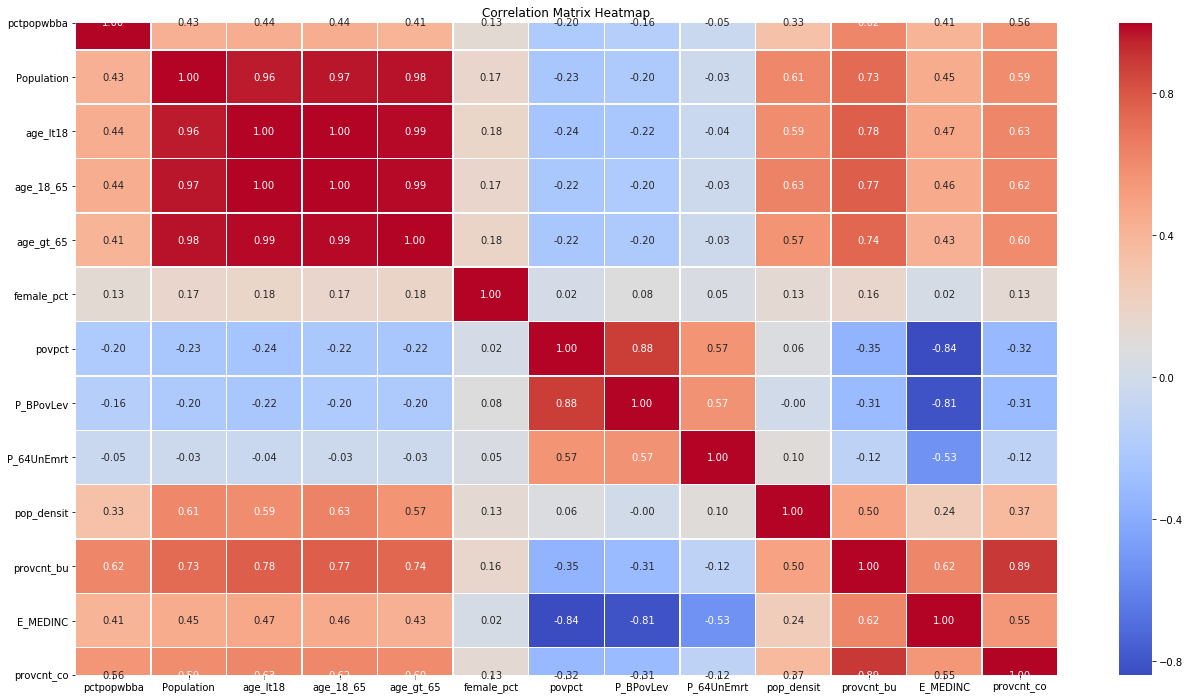

In [10]:
# now plotting a heat map to see corelation between varibles in a plot
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the columns for the correlation matrix
columns_of_interest = ['pctpopwbba', 'Population', 'age_lt18', 'age_18_65', 'age_gt_65',
                      'female_pct', 'povpct', 'P_BPovLev', 'P_64UnEmrt', 'pop_densit',
                      'provcnt_bu', 'E_MEDINC', 'provcnt_co']

# Create a DataFrame with only the specified columns
selected_columns_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_columns_df.corr()

# Set the size of the plot
plt.figure(figsize=(22, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Following a thorough analysis of the correlation matrix, we will strategically drop columns that exhibit weak correlation with our target variable. By doing so, we streamline the dataset, retaining only the most influential features. This tailored dataset will enhance the effectiveness of our subsequent data analysis and model development

In [11]:
df.drop('P_BPovLev', axis=1, inplace=True)
df.drop('female_pct', axis=1, inplace=True)
df.head

,pctpopwbba,Population,age_lt18,age_18_65,age_gt_65,E_MEDINC,povpct,P_64UnEmrt,pop_densit,provcnt_bu,provcnt_co,usac_rural
0,74.5,25343,4759,17400,3443,19948,26.9,6.3,44.864523,11,8,1
1,83.5,17712,4020,10393,2967,30332,10.7,2.6,39.784793,10,11,0
2,0.0,5143,1078,3046,1258,27793,12.2,3.5,9.795111,8,8,1
3,69.4,25388,6068,15554,4265,23528,17.2,6.6,37.117682,14,12,1
4,48.3,35789,8321,20248,7093,22485,20.2,4.9,45.068915,13,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110,18.8,12873,2777,7738,2937,18551,26.4,9.4,17.389481,8,8,1
111,51.9,39592,10028,21592,5268,25525,17.8,4.6,62.115239,9,7,1
112,63.5,2013,427,1141,506,25474,15.5,3.9,7.739857,7,7,1
113,15.6,18289,4636,10237,3418,19492,22.7,8.3,26.821932,9,7,1


With the data preprocessing complete, we'll move on to model the dataset using linear regression and decision tree algorithms. We'll start by implementing linear regression, which seeks to establish a linear relationship between the features and the target variable. Next, we'll employ a decision tree algorithm, a non-linear model that makes predictions based on a tree-like structure. Finally, we'll compare the performance of both models, evaluating their accuracy, precision, and other relevant metrics to determine the most suitable approach for our dataset.

In [17]:
# Subset the features and target variable
features = ['Population', 'age_lt18', 'age_18_65', 'age_gt_65', 'povpct', 'provcnt_bu', 'P_64UnEmrt', 'pop_densit','provcnt_co','E_MEDINC']
target = 'pctpopwbba'

In [18]:
# Split the data into training and testing sets

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [20]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
# Calculate evaluation metrics\n",
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print('Linear Regression Model:')
print('Mean Squared Error:', mse_linear)
print('R-squared:', r2_linear)

Linear Regression Model:
Mean Squared Error: 851.0150298163989
R-squared: -0.28883846414422343


In [21]:
# Train the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print('Decision Tree Model:')
print('Mean Squared Error:', mse_decision_tree)
print('R-squared:', r2_decision_tree)

Decision Tree Model:
Mean Squared Error: 722.5685714285715
R-squared: -0.09430989490256403


## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

Plotting a scatter plot comparing actual (y_test) and predicted values (y_pred_decision_tree) using the Decision Tree model, with a reference line (red dashed) for comparison.

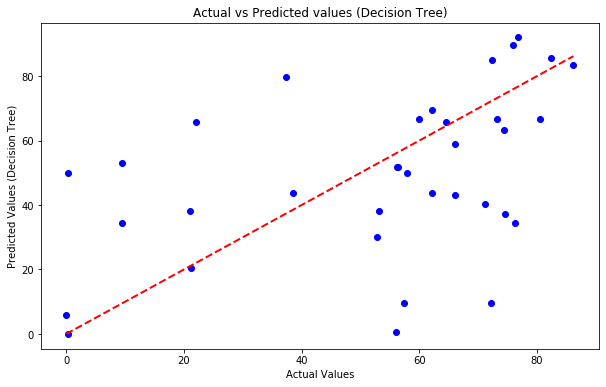

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_decision_tree, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted values (Decision Tree)')
plt.show()

Plotting a scatter plot comparing actual (y_test) and predicted values (y_pred_linear) using Linear Regression, with a reference line (red dashed) for comparison. visualizeing model performance by displaying how well predictions align with actual data.

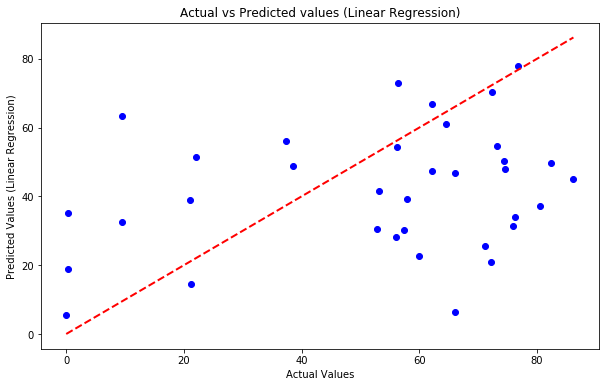

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Actual vs Predicted values (Linear Regression)')
plt.show()

Plotting a scatter plot comparing actual values (y_test) with predicted values from Decision Tree (blue) and Linear Regression (red). Also including a reference line for comparison and a legend for clarity.

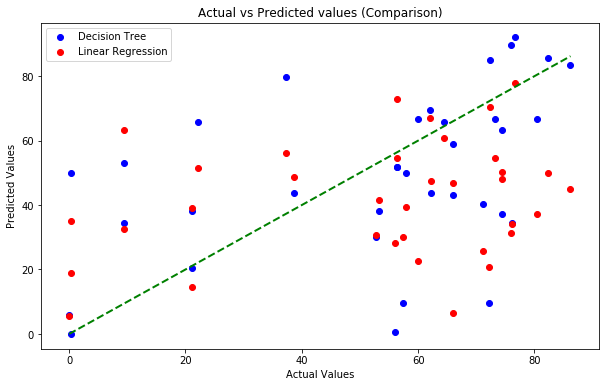

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_decision_tree, color='blue', label='Decision Tree')
plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs Predicted values (Comparison)')
plt.show()

Plotting the Mean Squared Error (MSE) between the Decision Tree and Linear Regression models, presenting it in a bar chart for easy visualization and comparison.

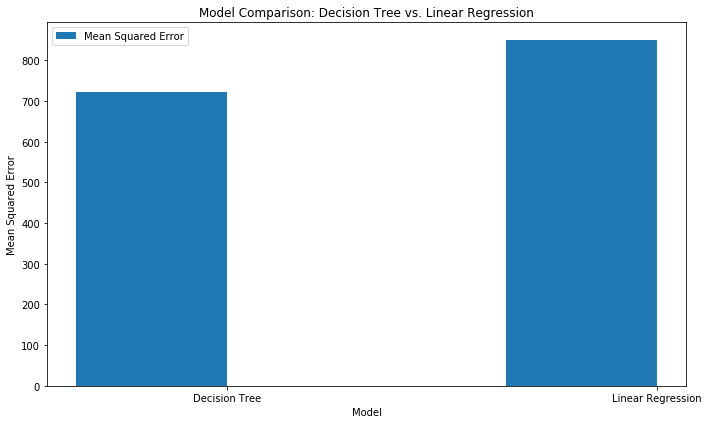

In [26]:
decision_tree_mse = mse_decision_tree
linear_regression_mse = mse_linear

# Data for plotting
models = ['Decision Tree', 'Linear Regression']
mse_values = [decision_tree_mse, linear_regression_mse]
x = np.arange(len(models)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mse_values, width, label='Mean Squared Error')
ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Model Comparison: Decision Tree vs. Linear Regression')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


Plotting a bar plot of counties with less than 50% broadband access counties, with their names on the x-axis and the percentage of the population with broadband access on the y-axis, visually highlighting areas with low broadband penetration.

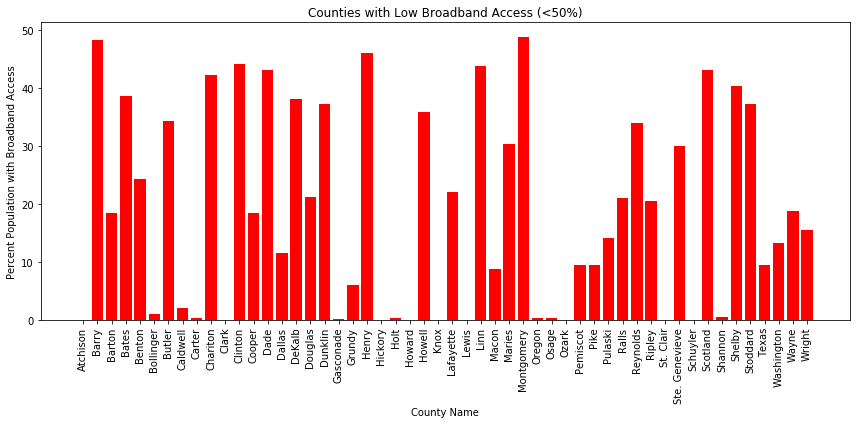

In [28]:
# Filter areas with low broadband access (less than 50%)
low_access_df = data_frame[data_frame['pctpopwbba'] < 50]

# Plotting areas with low broadband access
plt.figure(figsize=(12, 6))
plt.bar(low_access_df['cnty_name'], low_access_df['pctpopwbba'], color='red')
plt.xlabel('County Name')
plt.ylabel('Percent Population with Broadband Access')
plt.title('Counties with Low Broadband Access (<50%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The plot filters counties with 5 or fewer broadband providers(business and consumer) and presents this data in a bar plot, comparing the number of providers for each county, highlighting areas with limited broadband options.

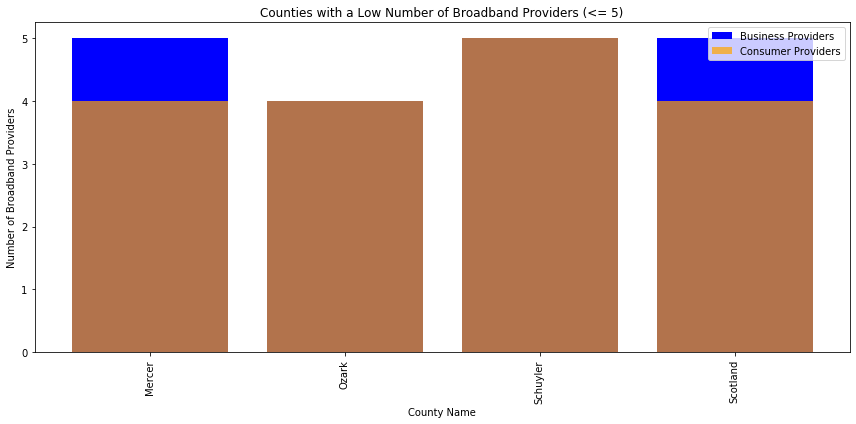

In [29]:
# Filter areas with a low number of broadband providers (<= 5)
low_provider_df = data_frame[(data_frame['provcnt_bu'] <= 5) & (data_frame['provcnt_co'] <= 5)]

# Plotting areas with a low number of broadband providers
plt.figure(figsize=(12, 6))
plt.bar(low_provider_df['cnty_name'], low_provider_df['provcnt_bu'], color='blue', label='Business Providers')
plt.bar(low_provider_df['cnty_name'], low_provider_df['provcnt_co'], color='orange', label='Consumer Providers', alpha=0.7)
plt.xlabel('County Name')
plt.ylabel('Number of Broadband Providers')
plt.title('Counties with a Low Number of Broadband Providers (<= 5)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Plotting a box plot comparing broadband access percentages between rural and urban areas, highlighting population broadband disparities in a visual and statistical manner.

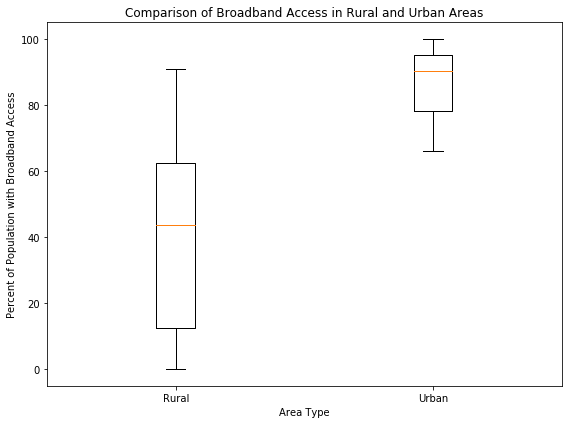

In [37]:
rural_urban_df = data_frame[data_frame['usac_rural'].isin(['Rural', 'Urban'])]

# Plotting a box plot to compare broadband access in rural and urban areas
plt.figure(figsize=(8, 6))
box_colors = ['lightblue', 'lightgreen']

plt.boxplot([rural_urban_df[rural_urban_df['usac_rural'] == 'Rural']['pctpopwbba'],
             rural_urban_df[rural_urban_df['usac_rural'] == 'Urban']['pctpopwbba']],
            labels=['Rural', 'Urban'])
plt.xlabel('Area Type')
plt.ylabel('Percent of Population with Broadband Access')
plt.title('Comparison of Broadband Access in Rural and Urban Areas')
plt.tight_layout()
plt.show()

Plotting a scatter plot illustrating the relationship between median income and broadband access percentages, aiding in understanding how income influences broadband accessibility across counties.

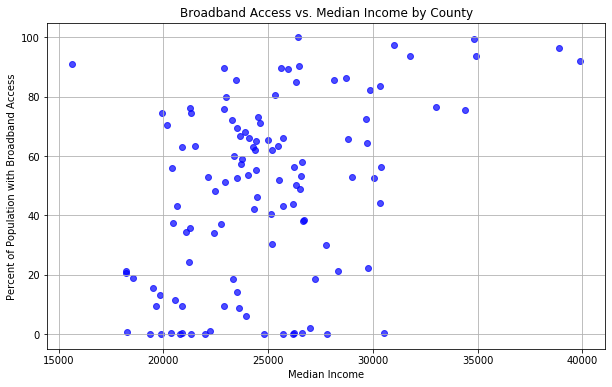

In [38]:
# Scatter plot to compare broadband access by income level
plt.figure(figsize=(10, 6))
plt.scatter(data_frame['E_MEDINC'], data_frame['pctpopwbba'], alpha=0.7, color='blue')
plt.xlabel('Median Income')
plt.ylabel('Percent of Population with Broadband Access')
plt.title('Broadband Access vs. Median Income by County')
plt.grid(True)
plt.show()

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


Briefly describe the story you are trying to tell with these data. Make sure to address the "So What!" aspect of the investigation.  Why did you coose the topic for analysis? What made it unique? Why would you consider it a data science project?


The motivation behind this analysis is to understand how access to high-speed internet, a quintessential aspect of modern life, is influenced by socio-economic factors. 

We focus on data related to counties, analyzing variables like population demographics, income levels, poverty rates, and the number of broadband providers. We believe that equitable access to broadband is fundamental for equal opportunities in education, job prospects, and healthcare. Our goal is to highlight areas with low broadband access and identify potential correlations with socio-economic conditions. 

Through visualizations like scatter plots, bar graphs, and box plots, we aim to present a clear narrative. We emphasize the disparities in broadband access, particularly in rural areas, and draw attention to the importance of bridging this digital divide. Our analysis is unique in that it combines technology, data analysis, and social implications. It underscores the significance of broadband access as a tool for social progress, making this a data science project with real-world implications. Through data-driven insights, we aim for policy changes and initiatives that promote broader broadband access, ultimately fostering a more connected and inclusive society.

## Step 8: Connect your workflow / process to the DSA-Project Life Cycle
- List **each** stage and then briefly discuss how important details from the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



In the Data Science Project Life Cycle ,(Step 2) guided our focus on bridging the digital divide for a more inclusive society. Data selection and preparation (Step 3) were essential in gathering county-level broadband and socio-economic data. The vetting of data sources (Step 4) ensured reliability and credibility. Filtering results and model validation (Step 5) allowed us to pinpoint areas with low broadband access. Visualization (Step 6) helped create impactful visuals, aiding in storytelling. Finally, effective communication (Step 7) ensured our narrative on socio-economic factors' influence on broadband access was conveyed clearly and resonated with our audience, promoting understanding and action.

## Step 9: Post the Story to Slack


Final step, **POST your most compelling visual and provide a brief description of what it conveys, to the mutual aid channel (the slack channel for the course).** Feel free to post more examples for people to look at and provide feedback. 

You might consider posting some aspects during the process. Your classmates will be vital providers of feedback in this process. Utilize them.

# Save your notebook, then `File > Close and Halt`